In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('data_src/inssurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data visualization

## Smoker proportion in the dataset

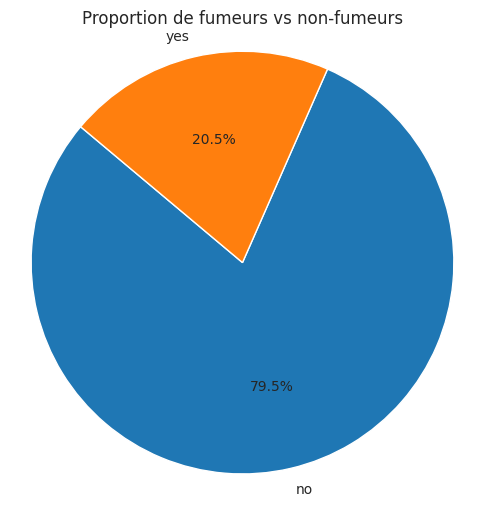

In [5]:
smoker_counts = data['smoker'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de fumeurs vs non-fumeurs')
plt.axis('equal')
plt.show()

## Children count distribution

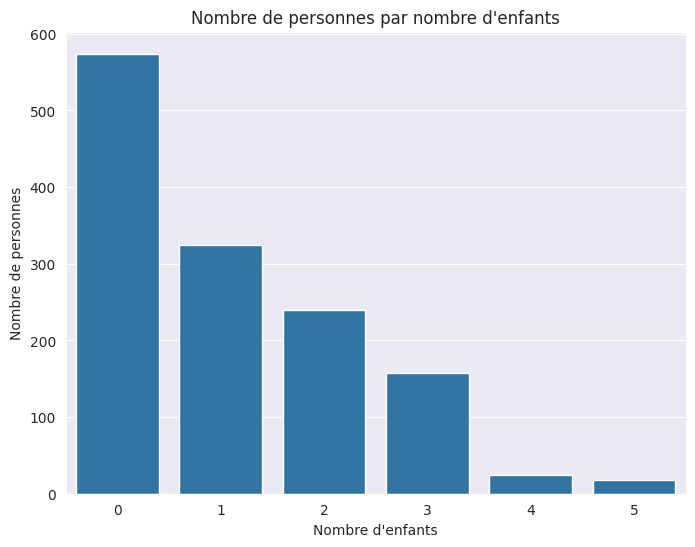

In [6]:
# Création du graphique en barres : nombre de gens par nombre d'enfants
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=data)
plt.title('Nombre de personnes par nombre d\'enfants')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Nombre de personnes')
plt.show()


## Comparaison of average charges by smoker status

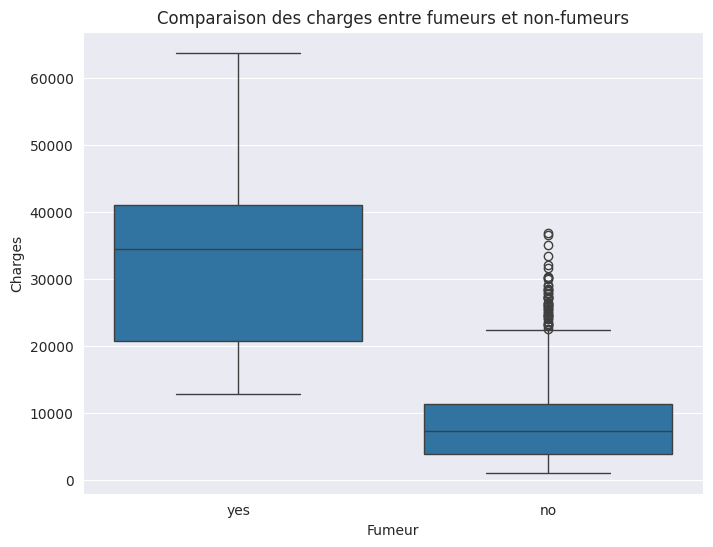

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Comparaison des charges entre fumeurs et non-fumeurs')
plt.xlabel('Fumeur')
plt.ylabel('Charges')
plt.show()

## Comparaison of average charges by number of children

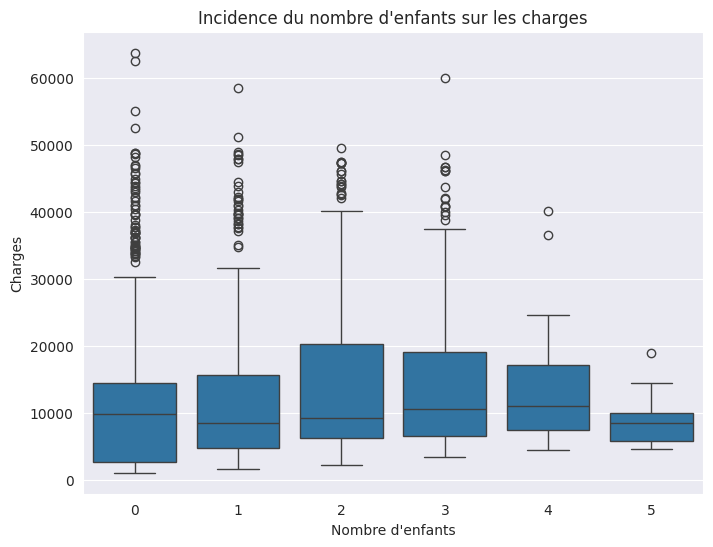

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=data)
plt.title('Incidence du nombre d\'enfants sur les charges')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Charges')
plt.show()

## Comparaison of average charge by sex

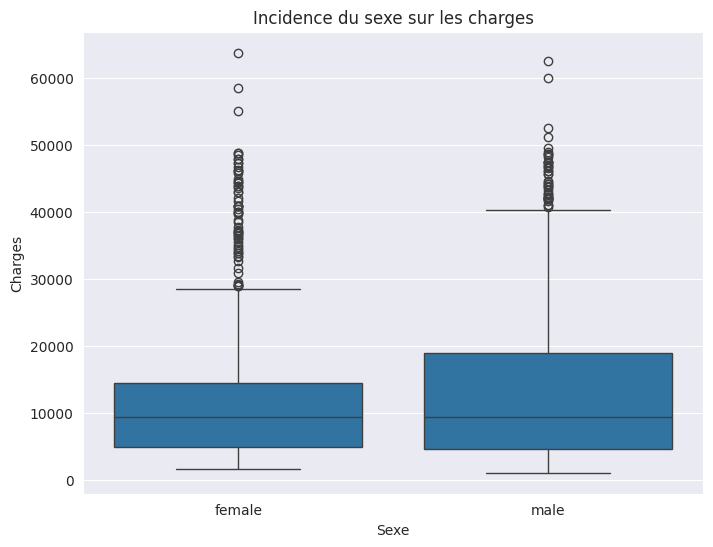

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Incidence du sexe sur les charges')
plt.xlabel('Sexe')
plt.ylabel('Charges')
plt.show()

## Comparaison of average charge by bmi

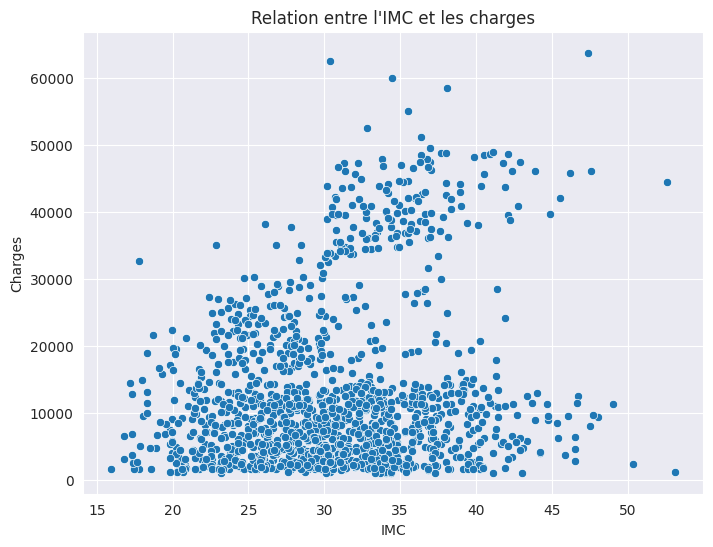

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Relation entre l\'IMC et les charges')
plt.xlabel('IMC')
plt.ylabel('Charges')
plt.show()

## Incidence of smocker status and imc on charges

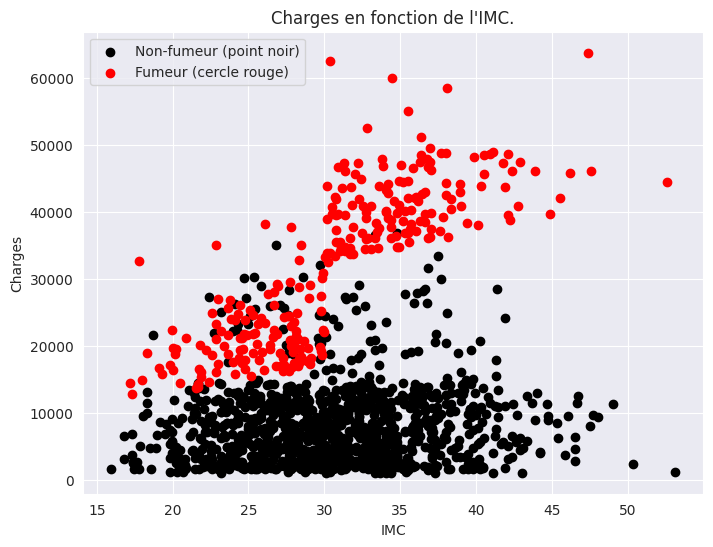

In [11]:
# Correction de l'erreur précédente : recréation du graphique 2D avec une gestion plus explicite des couleurs
plt.figure(figsize=(8, 6))

# Filtrage des fumeurs et non-fumeurs
fumeurs = data[data['smoker'] == 'yes']
non_fumeurs = data[data['smoker'] == 'no']

# Tracer les non-fumeurs
plt.scatter(non_fumeurs['bmi'], non_fumeurs['charges'],
            color='black', label='Non-fumeur (point noir)')

# Tracer les fumeurs
plt.scatter(fumeurs['bmi'], fumeurs['charges'],
            facecolors='red', edgecolors='red', label='Fumeur (cercle rouge)')

# Détails du graphique
plt.title('Charges en fonction de l\'IMC.')
plt.xlabel('IMC')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

## Age distribution

<Axes: xlabel='age', ylabel='Count'>

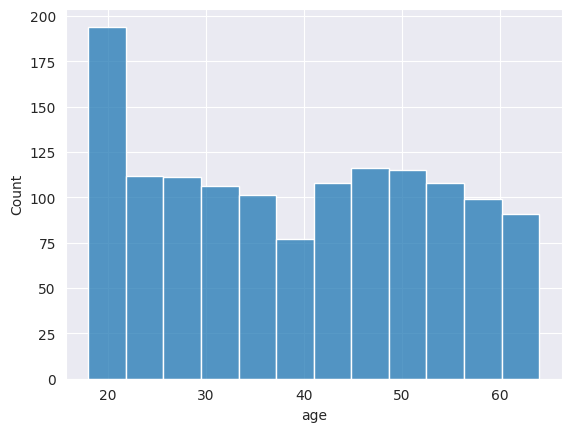

In [12]:
sns.histplot(data["age"])

## Sex distribution

<Axes: xlabel='sex', ylabel='Count'>

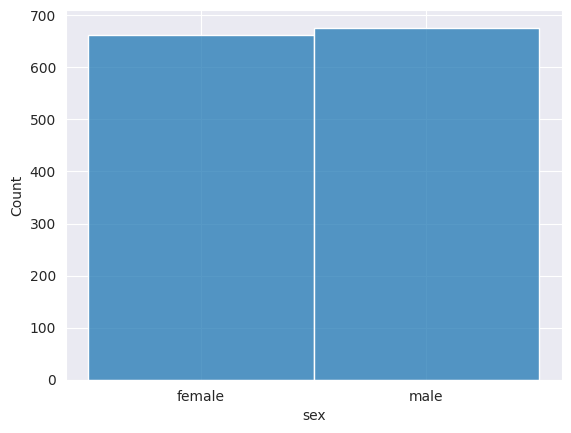

In [13]:
sns.histplot(data["sex"])

In [14]:
## Region distribution

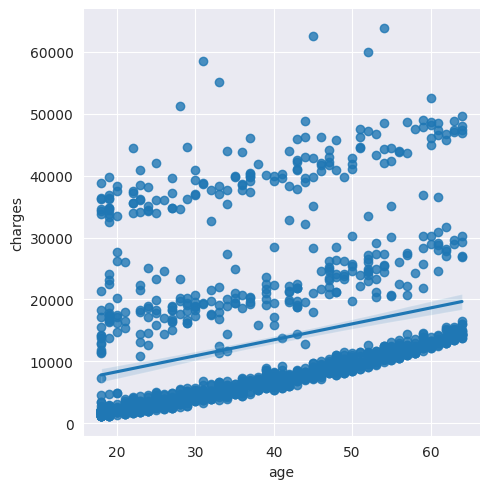

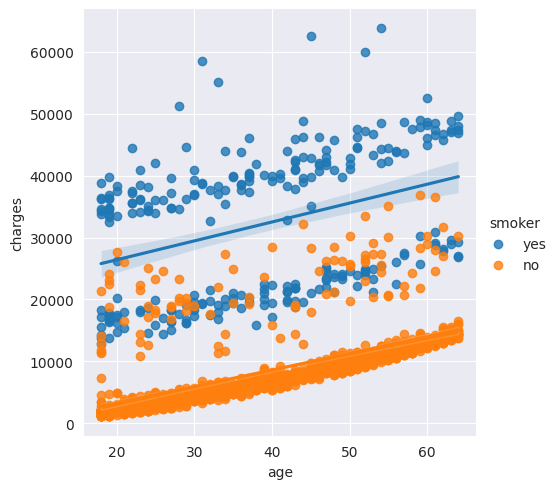

In [15]:
sns.lmplot(x='age', y='charges', data=data)
sns.lmplot(x='age', y='charges', hue='smoker', data=data)


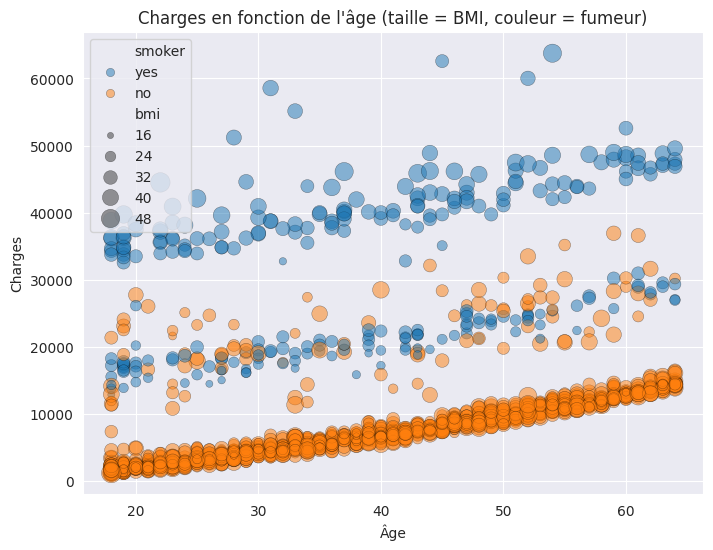

In [16]:
# Ajout du BMI avec la taille des points proportionnelle
plt.figure(figsize=(8, 6))

# Représentation graphique
sns.scatterplot(
    x='age',
    y='charges',
    size='bmi',
    hue='smoker',
    data=data,
    sizes=(20, 200),  # taille des points selon le BMI
    alpha=0.5,
    edgecolor='black',
    linewidth=0.3
)

plt.title('Charges en fonction de l\'âge (taille = BMI, couleur = fumeur)')
plt.xlabel('Âge')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import plotly.express as px
import plotly.offline as pyo

fig = px.scatter_3d(
    data_frame=data,
    x='age',
    y='bmi',
    z='charges',
    color='smoker',        # couleur selon fumeur ou non
    color_discrete_map={'yes': 'red', 'no': 'lightslategray'},
    title='Charges en fonction de l\'âge et de l\'IMC (rouge = fumeur, noir = non-fumeur)',
    labels={'age': 'Âge', 'bmi': 'IMC', 'charges': 'Charges'},
    opacity=0.7
)

pyo.plot(fig, filename='graph_interactif.html', auto_open=True)


'graph_interactif.html'

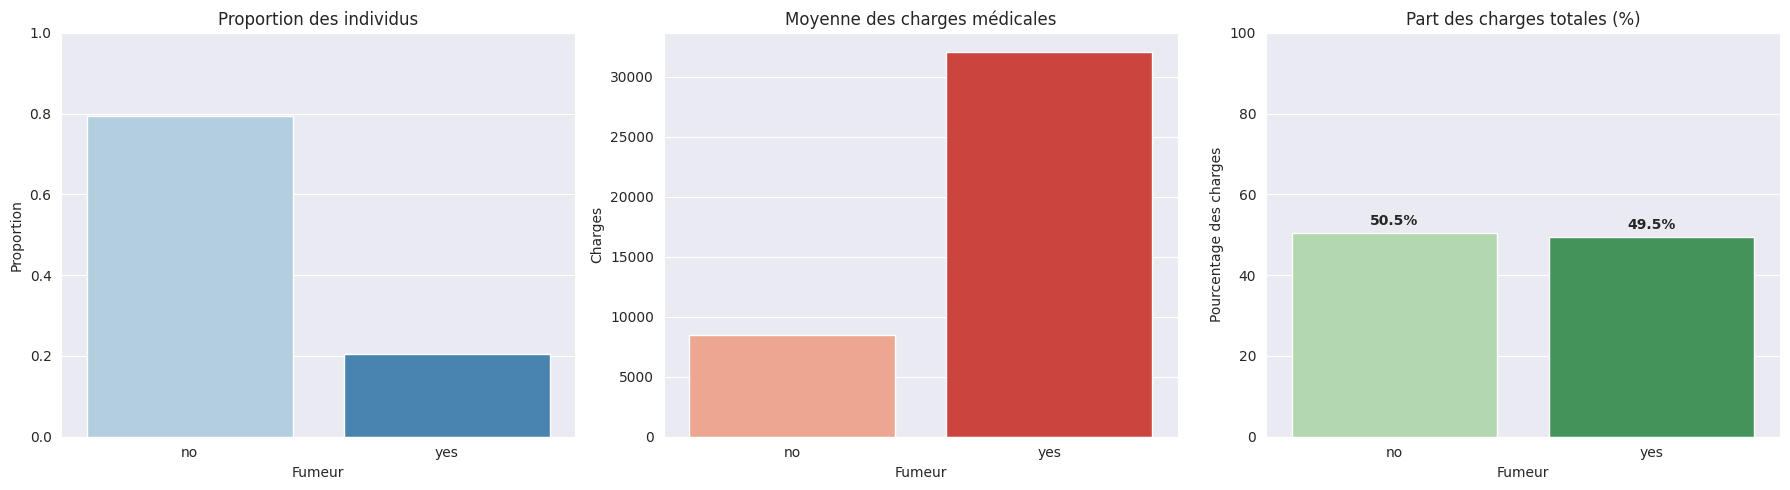

In [43]:
# Recalcul des valeurs à partir des données complètes
proportions = data['smoker'].value_counts(normalize=True)
moyennes_charges = data.groupby('smoker')['charges'].mean()
somme_charges = data.groupby('smoker')['charges'].sum()

# Création du DataFrame de synthèse
summary_df = pd.DataFrame({
    'Proportion des individus': proportions,
    'Moyenne des charges': moyennes_charges,
    'Somme des charges': somme_charges
}).reset_index().rename(columns={'index': 'smoker'})

# Ajout du pourcentage de charges
total_charges = summary_df['Somme des charges'].sum()
summary_df['Pourcentage des charges'] = summary_df['Somme des charges'] / total_charges * 100

# Création des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Graphique 1 : Proportion des individus
sns.barplot(
    x='smoker', y='Proportion des individus', hue='smoker',
    data=summary_df, palette='Blues', ax=axes[0], legend=False
)
axes[0].set_title('Proportion des individus')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Fumeur')
axes[0].set_ylabel('Proportion')

# Graphique 2 : Moyenne des charges
sns.barplot(
    x='smoker', y='Moyenne des charges', hue='smoker',
    data=summary_df, palette='Reds', ax=axes[1], legend=False
)
axes[1].set_title('Moyenne des charges médicales')
axes[1].set_xlabel('Fumeur')
axes[1].set_ylabel('Charges')

# Graphique 3 : Pourcentage des charges
sns.barplot(
    x='smoker', y='Pourcentage des charges', hue='smoker',
    data=summary_df, palette='Greens', ax=axes[2], legend=False
)
axes[2].set_title('Part des charges totales (%)')
axes[2].set_xlabel('Fumeur')
axes[2].set_ylabel('Pourcentage des charges')
axes[2].set_ylim(0, 100)

# Ajout des étiquettes en % sur le 3e graphique
for i, val in enumerate(summary_df['Pourcentage des charges']):
    axes[2].text(i, val + 2, f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Modele

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# 1. Sélection des colonnes d'intérêt
features = ['age', 'bmi', 'children', 'sex', 'smoker']
data_subset = data[features + ['charges']]

# 2. Encodage des variables catégorielles : sex et smoker
data_encoded = pd.get_dummies(data_subset, columns=['sex', 'smoker'], drop_first=True)

# 3. Séparation X et y
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prédiction et évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur absolue moyenne : {mae:.2f} $")
print(f"Score R² : {r2:.2f}")

# 7. Exemple de prédiction pour un nouveau profil
exemple = pd.DataFrame([{
    'age': 35,
    'bmi': 28.0,
    'children': 2,
    'sex_male': 1,
    'smoker_yes': 0  # changer à 1 pour un fumeur
}])

prediction = model.predict(exemple)[0]
print(f"Prime estimée pour ce profil : {prediction:.2f} $")


Erreur absolue moyenne : 4213.48 $
Score R² : 0.78
Prime estimée pour ce profil : 6901.46 $


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# 1. Sélection des colonnes d'intérêt
features = ['age', 'bmi', 'children', 'sex', 'smoker']
data_subset = data[features + ['charges']]

# 2. Encodage des variables catégorielles
data_encoded = pd.get_dummies(data_subset, columns=['sex', 'smoker'], drop_first=True)

# 3. Séparation X et y
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Prédiction et évaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur absolue moyenne : {mae:.2f} $")
print(f"Score R² : {r2:.2f}")

# 7. Exemple de prédiction pour un nouveau profil
exemple = pd.DataFrame([{
    'age': 35,
    'bmi': 28.0,
    'children': 2,
    'sex_male': 1,
    'smoker_yes': 0
}])

prediction = rf_model.predict(exemple)[0]
print(f"Prime estimée pour ce profil : {prediction:.2f} $")


Erreur absolue moyenne : 2551.61 $
Score R² : 0.86
Prime estimée pour ce profil : 6425.55 $
